# Twitter Data Analysis

In [1]:
import os
import tweepy as tw
import pandas as pd
import numpy as np

In [2]:
consumer_key= 'OqN95100ediMdZaZIAzbIziXU'
consumer_secret= 'eIV4qxuLYhY1w7G0wEWzL9pAVKvUESH1WKqdo9pQqCzNAvGdeF'
access_token= '3314061705-8ditQ1UvHK02vlEX1E7KvZ050Il1ZeXIcRtDRbV'
access_token_secret= 'ntrKgE1U14238E4zEnkdC1fZtzNFe92gmyVmk5HSBUvBj'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

# Search Twitter for Tweets

In [4]:
# Define the search term and the date_since date as variables
search_words = "george floyd"
date_since = "2020-05-25"

In [5]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(100)
tweets

In [6]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(100)

# Collect a list of tweets
i = [tweet.text for tweet in tweets]

In [7]:
new_search = search_words + " -filter:retweets"
new_search

'george floyd -filter:retweets'

In [8]:
tweets = tw.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(100)

l = [tweet.text for tweet in tweets]

# Who is Tweeting About "Search Words" ?

In [9]:
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(100)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [10]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])
g = tweet_text.groupby("location", sort=False)["user"].count()

In [11]:
g

location
Albuquerque, NM            1
Tampa, FL                  1
                          22
The End of the Rainbow     1
Mexico City, Mexico        1
                          ..
Occupied                   1
Seattle, WA                1
DC Metro Area              1
Occupied Tongva Land       1
San Antonio, Texas         1
Name: user, Length: 67, dtype: int64

# Word Frequency Analysis

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [13]:
search_term = "blacklivesmatter -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(100)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['Come through on Sunday for the @InsecureHBO Season 4 finale event, featuring a Q&amp;A with me and @YvonneOrji and a pe… https://t.co/gaxFcuSvI4',
 'How Long Will We Fight?\n#BlackLivesMatter #Protests #TheRevolutionWillBeTelevised  #EndPoliceBrutality… https://t.co/l68mtjZL1f',
 'Very helpful framework for self-reflection \n#BlackLivesMatter \n#MedEd \n#antiracism https://t.co/VqkF19eVFn',
 'Dee ordered us #blacklivesmatter shirts for tomorrow ✊🏾🖤',
 'Many of us are navigating the paradigm-shifting #BlackLivesMatter protests across the country with our cameras. IDA… https://t.co/cnjZahnMnu']

In [14]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [15]:
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['Come through on Sunday for the InsecureHBO Season 4 finale event featuring a QampA with me and YvonneOrji and a pe',
 'How Long Will We FightBlackLivesMatter Protests TheRevolutionWillBeTelevised EndPoliceBrutality',
 'Very helpful framework for selfreflection BlackLivesMatter MedEd antiracism',
 'Dee ordered us blacklivesmatter shirts for tomorrow',
 'Many of us are navigating the paradigmshifting BlackLivesMatter protests across the country with our cameras IDA']

In [16]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].split()

['Come',
 'through',
 'on',
 'Sunday',
 'for',
 'the',
 'InsecureHBO',
 'Season',
 '4',
 'finale',
 'event',
 'featuring',
 'a',
 'QampA',
 'with',
 'me',
 'and',
 'YvonneOrji',
 'and',
 'a',
 'pe']

In [17]:
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].lower().split()

['come',
 'through',
 'on',
 'sunday',
 'for',
 'the',
 'insecurehbo',
 'season',
 '4',
 'finale',
 'event',
 'featuring',
 'a',
 'qampa',
 'with',
 'me',
 'and',
 'yvonneorji',
 'and',
 'a',
 'pe']

In [18]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['come',
  'through',
  'on',
  'sunday',
  'for',
  'the',
  'insecurehbo',
  'season',
  '4',
  'finale',
  'event',
  'featuring',
  'a',
  'qampa',
  'with',
  'me',
  'and',
  'yvonneorji',
  'and',
  'a',
  'pe'],
 ['how',
  'long',
  'will',
  'we',
  'fightblacklivesmatter',
  'protests',
  'therevolutionwillbetelevised',
  'endpolicebrutality']]

In [19]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('a', 47),
 ('to', 44),
 ('blacklivesmatter', 39),
 ('the', 34),
 ('for', 25),
 ('and', 23),
 ('of', 20),
 ('we', 18),
 ('is', 17),
 ('black', 17),
 ('you', 16),
 ('are', 15),
 ('this', 15),
 ('not', 15),
 ('in', 14)]

In [20]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,a,47
1,to,44
2,blacklivesmatter,39
3,the,34
4,for,25


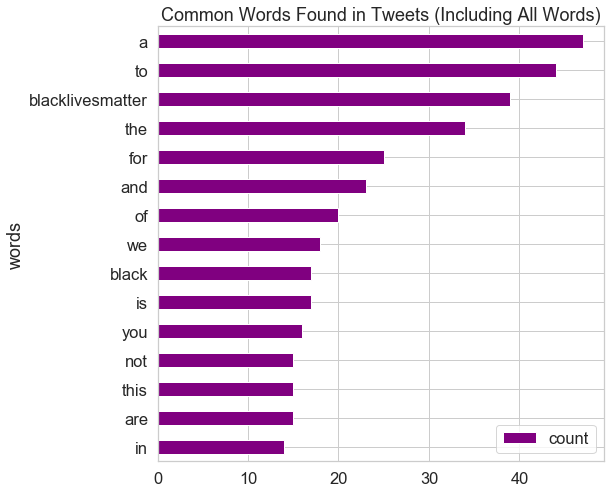

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

## Removing Stopwords from Analysis

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kiangolestaneh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stop_words = set(stopwords.words('english'))

# View a few words from the set
list(stop_words)[0:10]

['themselves',
 "hadn't",
 'by',
 'in',
 'wasn',
 'ma',
 'theirs',
 'was',
 'its',
 'them']

In [24]:
words_in_tweet[0]

['come',
 'through',
 'on',
 'sunday',
 'for',
 'the',
 'insecurehbo',
 'season',
 '4',
 'finale',
 'event',
 'featuring',
 'a',
 'qampa',
 'with',
 'me',
 'and',
 'yvonneorji',
 'and',
 'a',
 'pe']

In [25]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw[0]

['come',
 'sunday',
 'insecurehbo',
 'season',
 '4',
 'finale',
 'event',
 'featuring',
 'qampa',
 'yvonneorji',
 'pe']

In [26]:
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('blacklivesmatter', 39),
 ('black', 17),
 ('amp', 12),
 ('want', 8),
 ('see', 8),
 ('statement', 8),
 ('real', 7),
 ('protect', 7),
 ('action', 6),
 ('pr', 6),
 ('protests', 5),
 ('racism', 5),
 ('lives', 5),
 ('matter', 5),
 ('us', 4)]

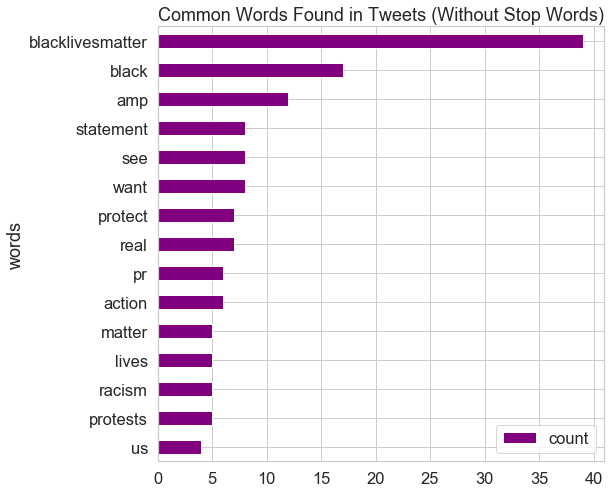

In [27]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

## Removing Collection Words from Analysis

In [28]:
collection_words = ['blacklivesmatter', 'blm', 'black']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]
tweets_nsw[0], tweets_nsw_nc[0]

(['come',
  'sunday',
  'insecurehbo',
  'season',
  '4',
  'finale',
  'event',
  'featuring',
  'qampa',
  'yvonneorji',
  'pe'],
 ['come',
  'sunday',
  'insecurehbo',
  'season',
  '4',
  'finale',
  'event',
  'featuring',
  'qampa',
  'yvonneorji',
  'pe'])

In [29]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('amp', 12),
 ('want', 8),
 ('see', 8),
 ('statement', 8),
 ('real', 7),
 ('protect', 7),
 ('action', 6),
 ('pr', 6),
 ('protests', 5),
 ('racism', 5),
 ('lives', 5),
 ('matter', 5),
 ('us', 4),
 ('family', 4),
 ('f', 4)]

In [30]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,amp,12
1,want,8
2,see,8
3,statement,8
4,real,7


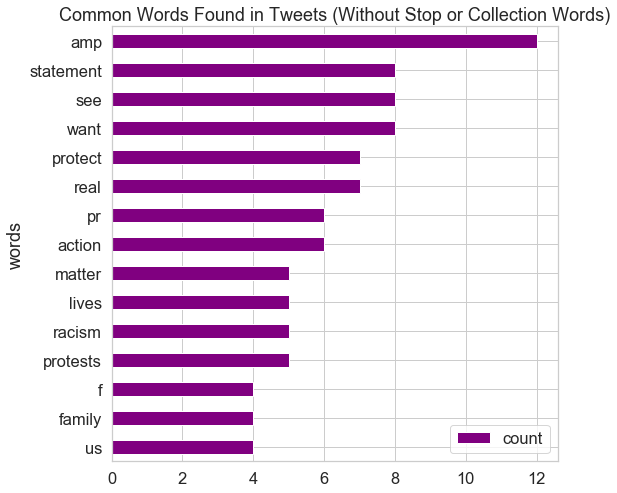

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

# Analyze Co-occurrence and Networks of Words 

In [32]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [33]:
# Create a custom search term and define the number of tweets
search_term = "#blacklivesmatter -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

In [34]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    no_url = url_pattern.sub(r'', txt)

    return no_url

In [35]:
# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kiangolestaneh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[0]

[('people', 'looking'),
 ('looking', 'negative'),
 ('negative', '#blacklivesmatter'),
 ('#blacklivesmatter', 'movement'),
 ('movement', 'right'),
 ('right', 'now,'),
 ('now,', 'part'),
 ('part', 'problem!'),
 ('problem!', 'you…')]

In [37]:
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

[(('lives', 'matter'), 21),
 (('statistics', '1900'), 18),
 (('1900', 'days'), 18),
 (('days', 'saudi-american'), 18),
 (('saudi-american', 'aggression'), 18),
 (('aggression', 'yemen'), 15),
 (('yemen', '#blacklivesmatter'), 15),
 (('support', '#blacklivesmatter'), 14),
 (('#blacklivesmatter', 'movement'), 11),
 (('want', 'see'), 10),
 (('see', 'real'), 10),
 (('real', 'action,'), 10),
 (('action,', 'pr'), 10),
 (('pr', 'statement.'), 10),
 (('statement.', 'protect'), 10),
 (('#blm', '#blacklivesmatter'), 9),
 (('made', 'video'), 8),
 (('video', '„black'), 8),
 (('„black', 'lives'), 8),
 (('lives', 'matter“.'), 8)]

In [38]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(lives, matter)",21
1,"(statistics, 1900)",18
2,"(1900, days)",18
3,"(days, saudi-american)",18
4,"(saudi-american, aggression)",18
5,"(aggression, yemen)",15
6,"(yemen, #blacklivesmatter)",15
7,"(support, #blacklivesmatter)",14
8,"(#blacklivesmatter, movement)",11
9,"(want, see)",10


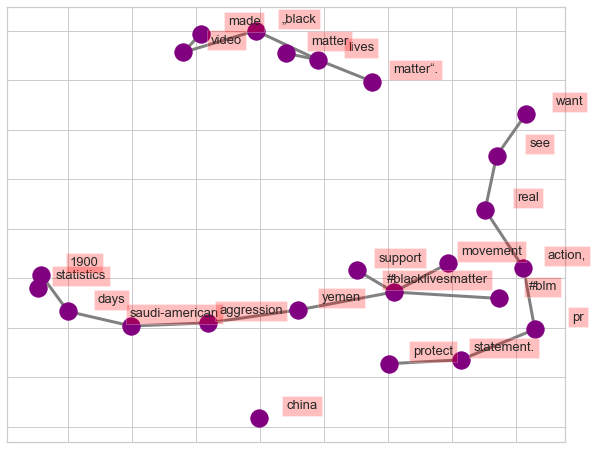

In [39]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

# Twitter Data Sentiment Analysis

### Sentiment analysis is a method of identifying attitudes in text data about a subject of interest. It is scored using polarity values that range from 1 to -1. Values closer to 1 indicate more positivity, while values closer to -1 indicate more negativity.



In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [41]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [42]:
# Create a custom search term and define the number of tweets
search_term = "blacklivesmatter -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(100)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [43]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("BravoTV Andy ALL blacklivesmatter not just those who Bravo considers to be politically correct and do not"))

In [44]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

[0.0,
 'BravoTV Andy ALL blacklivesmatter not just those who Bravo considers to be politically correct and do not']

In [45]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.000000,BravoTV Andy ALL blacklivesmatter not just tho...
1,0.450000,Donationbased yoga class to support laynalewis...
2,-0.008333,repmarkpocan We want to see real action not a ...
3,0.000000,Roggg13 Douniabyun1485 adorbleDO MEXO16l ranhu...
4,0.000000,I thought BlackLivesMatter So CaptDavidDorns d...


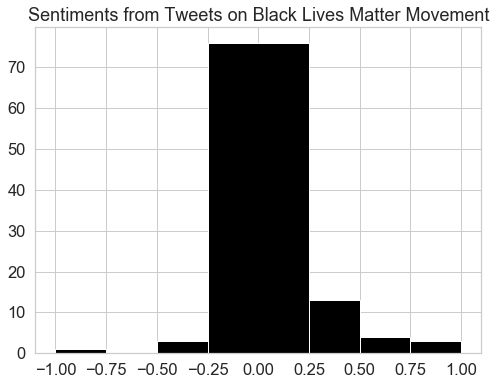

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="black")

plt.title("Sentiments from Tweets on Black Lives Matter Movement")
plt.show()

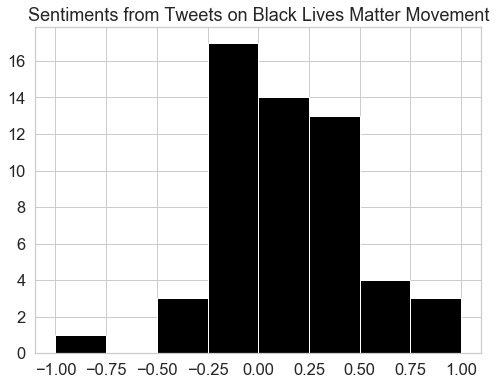

In [47]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="black")

plt.title("Sentiments from Tweets on Black Lives Matter Movement")
plt.show()